In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive/ML_Projects/Email_clf'

Email.ipynb  spamdata.csv


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [9]:
df = pd.read_csv('/content/drive/My Drive/ML_Projects/Email_clf/spamdata.csv',encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df = df.filter(["v1", "v2"])

In [19]:
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
lemmatizer = WordNetLemmatizer()
# removing stopwords 
stopwords = set(stopwords.words('english'))

In [27]:
def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

In [28]:
# Processing text messages
df['text'] = df['text'].apply(review_messages)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.25, random_state = 0, stratify = df['label'])

In [58]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tfidf_vect.fit(x_train)
x_train_tfidf = tfidf_vect.fit_transform(x_train)
x_test_tfidf = tfidf_vect.transform(x_test)
print(x_train_tfidf.shape, y_train.shape)
print(x_test_tfidf.shape, y_test.shape)

(4179, 1229) (4179,)
(1393, 1229) (1393,)


In [36]:
def confusionMatrix(x, y):
  confusion_matrix = metrics.confusion_matrix(x, y)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()

In [60]:
clf = SVC()
clf.fit(x_train_tfidf, y_train)

SVC()

In [61]:
y_pred = clf.predict(x_test_tfidf)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.87      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



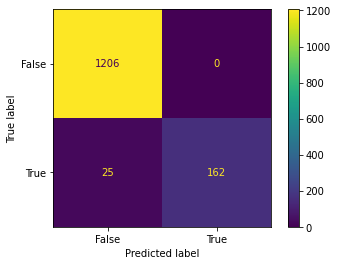

In [62]:
print(metrics.classification_report(y_test, y_pred))
confusionMatrix(y_test, y_pred)

In [63]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'kernel':['rbf','poly','linear']}

In [64]:
from sklearn.model_selection import RandomizedSearchCV
rnd_search = RandomizedSearchCV(SVC(), parameters, 
n_iter =20, cv=9)

In [66]:
rnd_search.fit(x_train_tfidf,y_train)

RandomizedSearchCV(cv=9, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'kernel': ['rbf', 'poly', 'linear']})

In [67]:
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'kernel': 'rbf', 'gamma': 1, 'C': 100}
0.9868398014254522


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.99      0.89      0.94       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



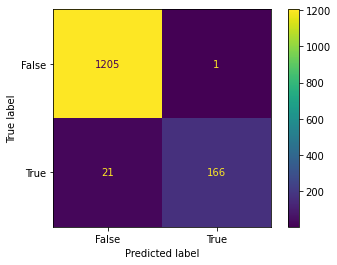

In [68]:
model = SVC(gamma=1, C=100, kernel='rbf')
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)
print(metrics.classification_report(y_test, y_pred))
confusionMatrix(y_test, y_pred)


In [71]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
import re
def CleanText1(reviews):
    reviews = re.sub(r"http\S+", "", reviews)
    reviews = BeautifulSoup(reviews, 'lxml').get_text()
    reviews = re.sub(r"won't", "will not", reviews)
    reviews = re.sub(r"can\'t", "can not", reviews)
    reviews = re.sub(r"n\'t", " not", reviews)
    reviews = re.sub(r"\'re", " are", reviews)
    reviews = re.sub(r"\'s", " is", reviews)
    reviews = re.sub(r"\'d", " would", reviews)
    reviews = re.sub(r"\'ll", " will", reviews)
    reviews = re.sub(r"\'t", " not", reviews)
    reviews = re.sub(r"\'ve", " have", reviews)
    reviews = re.sub(r"\'m", " am", reviews)
    reviews = re.sub("\S*\d\S*", "", reviews).strip()
    reviews = re.sub('[^A-Za-z]+', ' ', reviews)
    reviews = ' '.join(e.lower() for e in reviews.split() if e.lower() not in stopwords)
    return [reviews.strip()]

In [78]:
rev = CleanText1('buy free messages only 200$')
print(rev)
revbow = tfidf_vect.transform(rev)

['buy free messages']


In [79]:
model.predict(revbow)[0]

'ham'

In [75]:
import pickle
from google.colab import files
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))
files.download('model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
pickle.dump(tfidf_vect, open('tfidf.sav', 'wb'))
files.download('tfidf.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>